In [1]:
import sys
sys.path.append('build')
from compugraph import test

test()

CompuGraph Testing Version 0.0.1


In [2]:
import sys
sys.path.append('build')
from compugraph import dot

dot()

Test BLAS and LAPACK
{{ 19.,  22.},
 { 43.,  50.}}

In [3]:
import gzip
import os
from urllib.request import urlretrieve
import numpy as np

# train-images-idx3-ubyte.gz: training set images (9912422 bytes)
# train-labels-idx1-ubyte.gz: training set labels (28881 bytes)
# t10k-images-idx3-ubyte.gz: test set images (1648877 bytes)
# t10k-labels-idx1-ubyte.gz: test set labels (4542 bytes)

def load_idx(filepath):
    with gzip.open(filepath, 'rb') as fin:
        idx_data = fin.read()
        idx = 0
        unsigned = idx_data[idx + 2] == 8
        dim = idx_data[idx + 3]
        idx += 4

        dim_shape = []
        for i in range(dim):
            dim_shape.append(int.from_bytes(idx_data[idx:idx+4], 'big', signed=False))
            idx += 4

        if unsigned:
            return np.frombuffer(idx_data[idx:], np.uint8).reshape(dim_shape)
        return None

def select_images():
    if (not os.path.exists('data')):
        os.makedirs('data')
    if (not os.path.exists('data/train-images-idx3-ubyte.gz')):
        urlretrieve('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz', 'data/train-images-idx3-ubyte.gz')
    if (not os.path.exists('data/train-labels-idx1-ubyte.gz')):
        urlretrieve('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz', 'data/train-labels-idx1-ubyte.gz')
    if (not os.path.exists('data/t10k-images-idx3-ubyte.gz')):
        urlretrieve('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz', 'data/t10k-images-idx3-ubyte.gz')
    if (not os.path.exists('data/t10k-labels-idx1-ubyte.gz')):
        urlretrieve('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz', 'data/t10k-labels-idx1-ubyte.gz')
    train_images_data = load_idx('data/train-images-idx3-ubyte.gz')
    train_labels_data = load_idx('data/train-labels-idx1-ubyte.gz')
    test_images_data = load_idx('data/t10k-images-idx3-ubyte.gz')
    test_labels_data = load_idx('data/t10k-labels-idx1-ubyte.gz')

    images_list = []
    labels_list = []
    for n in range(10):
        idx = np.where(train_labels_data == n)[0][:]
        images_list.append(train_images_data[idx])
        labels_list.extend(train_labels_data[idx])
    train_images = np.vstack(images_list)
    train_labels = np.vstack(labels_list).reshape(-1)
    train_labels = np.eye(10)[train_labels]

    images_list = []
    labels_list = []
    for n in range(10):
        idx = np.where(test_labels_data == n)[0][:]
        images_list.append(test_images_data[idx])
        labels_list.extend(test_labels_data[idx])
    test_images = np.vstack(images_list)
    test_labels = np.vstack(labels_list).reshape(-1)
    test_labels = np.eye(10)[test_labels]

    return train_images, train_labels, test_images, test_labels

train_images, train_labels, test_images, test_labels = select_images()

X_train = (train_images.reshape(train_images.shape[0], -1) / 255.0).astype(np.float64)
Y_train = train_labels.astype(np.float32)
X_test = (test_images.reshape(test_images.shape[0], -1) / 255.0).astype(np.float64)
Y_test = test_labels.astype(np.float64)

In [2]:
import sys
sys.path.append('build')
from compugraph import mlp1
import numpy as np

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

results = mlp1(X_train, Y_train, X_test, Y_test, 10)
results

X_train shape: (60000, 784)
Y_train shape: (60000, 10)
X_test shape: (10000, 784)
Y_test shape: (10000, 10)


[{'test_accuracy': 0.9400040064102564,
  'test_loss': 215.43865001065973,
  'train_accuracy': 0.8409455128205128,
  'train_loss': 1450.6666634422004},
 {'test_accuracy': 0.9469150641025641,
  'test_loss': 154.6939594993762,
  'train_accuracy': 0.9491519764957265,
  'train_loss': 958.1899573961573},
 {'test_accuracy': 0.9611378205128205,
  'test_loss': 112.97273838238976,
  'train_accuracy': 0.9601028311965812,
  'train_loss': 843.9909705950989},
 {'test_accuracy': 0.9632411858974359,
  'test_loss': 109.48542966788666,
  'train_accuracy': 0.9662293002136753,
  'train_loss': 728.1846685483381},
 {'test_accuracy': 0.9652443910256411,
  'test_loss': 84.44598862740034,
  'train_accuracy': 0.9697349091880342,
  'train_loss': 593.8924022973684},
 {'test_accuracy': 0.9681490384615384,
  'test_loss': 83.42520846208245,
  'train_accuracy': 0.97265625,
  'train_loss': 539.253673644755},
 {'test_accuracy': 0.9685496794871795,
  'test_loss': 59.522566098972376,
  'train_accuracy': 0.975744524572649

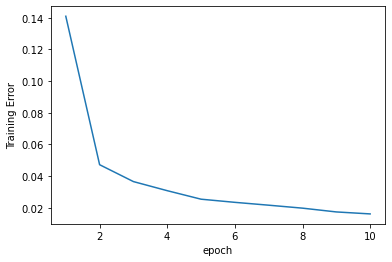

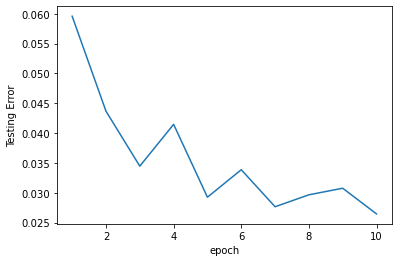

In [4]:
import matplotlib.pyplot as plt

x = list(range(1, len(results) + 1))
train_err = [1 - result['train_accuracy'] for result in results]
test_err = [1 - result['test_accuracy'] for result in results]

plt.plot(x, train_err)
plt.xlabel('epoch')
plt.ylabel('Training Error')
plt.show()

plt.plot(x, test_err)
plt.xlabel('epoch')
plt.ylabel('Testing Error')
plt.show()

In [4]:
import sys
sys.path.append('build')
from compugraph import mlp2
import numpy as np

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

results = mlp2(X_train, Y_train, X_test, Y_test, 10)
results

X_train shape: (60000, 784)
Y_train shape: (60000, 10)
X_test shape: (10000, 784)
Y_test shape: (10000, 10)


[{'test_accuracy': 0.9562,
  'test_loss': 495.2986973825311,
  'train_accuracy': 0.8498666666666667,
  'train_loss': 1867.6980826915114},
 {'test_accuracy': 0.9644,
  'test_loss': 357.5691057218978,
  'train_accuracy': 0.9626833333333333,
  'train_loss': 706.0596523925387},
 {'test_accuracy': 0.9682,
  'test_loss': 232.397622340048,
  'train_accuracy': 0.9738833333333333,
  'train_loss': 532.1225642956066},
 {'test_accuracy': 0.9761,
  'test_loss': 220.99003519473146,
  'train_accuracy': 0.9793,
  'train_loss': 386.7480834856332},
 {'test_accuracy': 0.9699,
  'test_loss': 241.53584871568808,
  'train_accuracy': 0.9826833333333334,
  'train_loss': 343.80083144127263},
 {'test_accuracy': 0.9763,
  'test_loss': 329.554702325888,
  'train_accuracy': 0.9838833333333333,
  'train_loss': 282.2484916556042},
 {'test_accuracy': 0.9736,
  'test_loss': 281.9964165034132,
  'train_accuracy': 0.9867,
  'train_loss': 256.75099366381653},
 {'test_accuracy': 0.9785,
  'test_loss': 286.0005075771953,
 

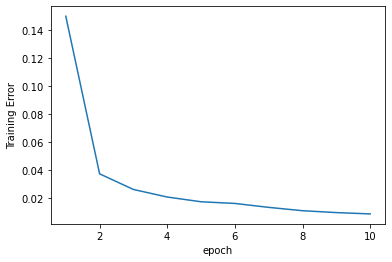

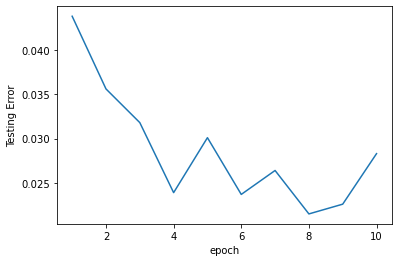

In [5]:
import matplotlib.pyplot as plt

x = list(range(1, len(results) + 1))
train_err = [1 - result['train_accuracy'] for result in results]
test_err = [1 - result['test_accuracy'] for result in results]

plt.plot(x, train_err)
plt.xlabel('epoch')
plt.ylabel('Training Error')
plt.show()

plt.plot(x, test_err)
plt.xlabel('epoch')
plt.ylabel('Testing Error')
plt.show()